In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import datetime

In [2]:
weather_summary = pd.read_csv('monthly_weather_averages.csv')
flight_summary = pd.read_csv('Summary Flight Tables/monthly_summary.csv')

In [3]:
weather_summary = weather_summary.drop(columns=["Unnamed: 0"])

In [4]:
flight_summary = flight_summary.drop(columns=["Unnamed: 0"])

In [5]:
weather = weather_summary.set_index('Date', inplace=True)
weather = weather_summary.index = pd.to_datetime(weather_summary.index)
weather_summary

,Latitude,Longitude,Max Temp,Precip,Wind Speed,Airport
Date,,,,,,
2015-01-31,32.896,-97.037,53.941935,0.116129,16.906452,DFW
2015-02-28,32.896,-97.037,55.828571,0.107143,19.442857,DFW
2015-03-31,32.896,-97.037,64.629032,0.082258,15.983871,DFW
2015-04-30,32.896,-97.037,74.166667,0.185000,18.783333,DFW
2015-05-31,32.896,-97.037,78.296774,0.548710,19.332258,DFW
...,...,...,...,...,...,...
2018-08-31,41.979,-87.904,83.903226,0.218387,15.654839,ORD
2018-09-30,41.979,-87.904,77.060000,0.121333,14.876667,ORD
2018-10-31,41.979,-87.904,60.409677,0.154839,15.445161,ORD


In [6]:
monthly_mean = weather_summary.resample("M").mean()

In [7]:
monthly_mean

,Latitude,Longitude,Max Temp,Precip,Wind Speed
Date,,,,,
2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290
2015-02-28,36.463,-98.4886,48.344286,0.098429,17.013571
2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774
2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000
2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097
2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667
2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065
2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968
2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667


In [8]:
flight_summary["Date"] = flight_summary["Date"].astype('datetime64[ns]')
flight_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     48 non-null     datetime64[ns]
 1   # Cancelled Flights      48 non-null     int64         
 2   # Non-Cancelled Flights  48 non-null     int64         
 3   Total Flights            48 non-null     int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.6 KB


In [9]:
combined = pd.merge(monthly_mean, flight_summary, on="Date")
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400
1,2015-02-28,36.463,-98.4886,48.344286,0.098429,17.013571,4296,96062,100358
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917


In [10]:
combined = combined.drop(1)
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917
10,2015-11-30,36.463,-98.4886,61.538667,0.163133,16.866000,836,108694,109530


In [11]:
combined["Month"] = combined["Date"].dt.month_name()
combined["Year"] = combined["Date"].dt.year
combined["Year"] = combined ["Year"].astype('object')
combined.head()

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Month,Year
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400,January,2015
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057,March,2015
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350,April,2015
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985,May,2015
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623,June,2015


In [12]:
combined["X Label"] = combined["Month"].astype(str) + " " + combined["Year"].astype(str)
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Month,Year,X Label
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400,January,2015,January 2015
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057,March,2015,March 2015
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350,April,2015,April 2015
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985,May,2015,May 2015
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623,June,2015,June 2015
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471,July,2015,July 2015
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540,August,2015,August 2015
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429,September,2015,September 2015
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917,October,2015,October 2015
10,2015-11-30,36.463,-98.4886,61.538667,0.163133,16.866000,836,108694,109530,November,2015,November 2015


### Scatterplots

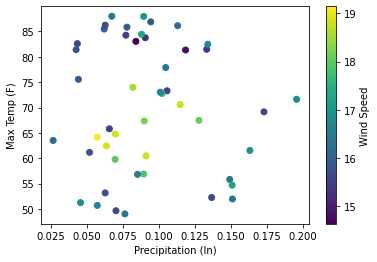

In [13]:
#Monthly Avg. Temp vs Monthly Avg. Precipitation
plt.scatter(combined['Precip'],combined['Max Temp'],c=combined['Wind Speed'])
clb = plt.colorbar()
plt.xlabel("Precipitation (In)")
plt.ylabel("Max Temp (F)")
clb.set_label("Wind Speed")
plt.show()

In [14]:
#Correlation
precip = combined.iloc[:,4]
max_temp = combined.iloc[:,3]
correlation = st.pearsonr(precip,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.05


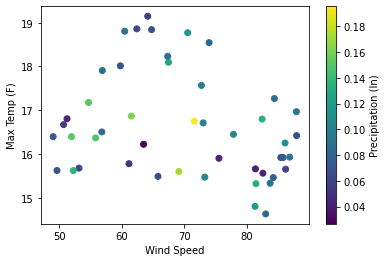

In [15]:
#Monthly Avg. Temp vs Monthly avg. Wind Speed 
plt.scatter(combined['Max Temp'],combined['Wind Speed'],c=combined['Precip'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Max Temp (F)")
clb.set_label("Precipitation (In)")
plt.show()

In [16]:
#Correlation
wind_speed = combined.iloc[:,5]
max_temp = combined.iloc[:,3]
correlation = st.pearsonr(wind_speed,max_temp)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.28


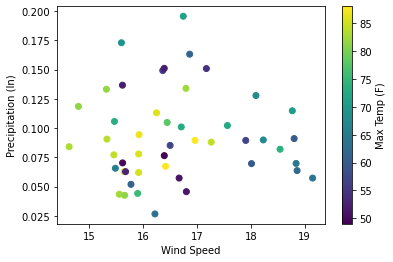

In [17]:
#Wind speed vs precipitation &  temp as colored data points for cancelled flights 
plt.scatter(combined['Wind Speed'],combined['Precip'],c=combined['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precipitation (In)")
clb.set_label("Max Temp (F)")
plt.show()

In [18]:
#Correlation
wind_speed = combined.iloc[:,5]
precip = combined.iloc[:,4]
correlation = st.pearsonr(wind_speed,precip)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.0


In [19]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(wind_speed, precip)
pe_fit = pe_slope * wind_speed + pe_int

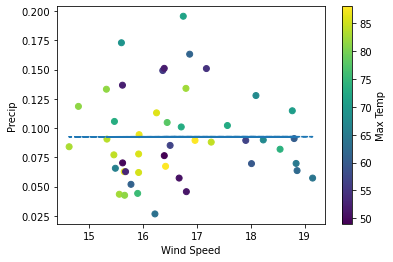

In [20]:
plt.scatter(combined['Wind Speed'],combined['Precip'],c=combined['Max Temp'])
clb = plt.colorbar()
plt.xlabel("Wind Speed")
plt.ylabel("Precip")
clb.set_label("Max Temp")
plt.plot(wind_speed,pe_fit,"--")
plt.show()

### Bar Charts / Error Bars

In [21]:
combined

,Date,Latitude,Longitude,Max Temp,Precip,Wind Speed,# Cancelled Flights,# Non-Cancelled Flights,Total Flights,Month,Year,X Label
0,2015-01-31,36.463,-98.4886,49.652258,0.070258,15.621290,1250,108150,109400,January,2015,January 2015
2,2015-03-31,36.463,-98.4886,61.165161,0.051935,15.776774,1759,116298,118057,March,2015,March 2015
3,2015-04-30,36.463,-98.4886,67.489333,0.127800,18.096000,585,112765,113350,April,2015,April 2015
4,2015-05-31,36.463,-98.4886,71.618710,0.195548,16.747097,919,116066,116985,May,2015,May 2015
5,2015-06-30,36.463,-98.4886,81.482000,0.133200,15.320667,886,117737,118623,June,2015,June 2015
6,2015-07-31,36.463,-98.4886,85.463871,0.062065,15.918065,243,122228,122471,July,2015,July 2015
7,2015-08-31,36.463,-98.4886,86.228387,0.062774,15.650968,355,121185,121540,August,2015,August 2015
8,2015-09-30,36.463,-98.4886,83.038000,0.084067,14.628667,187,112242,112429,September,2015,September 2015
9,2015-10-31,36.463,-98.4886,73.297419,0.105677,15.469677,371,116546,116917,October,2015,October 2015
10,2015-11-30,36.463,-98.4886,61.538667,0.163133,16.866000,836,108694,109530,November,2015,November 2015


In [22]:
monthly_precip = combined.groupby('X Label')
monthly_avg_precip = monthly_precip['X Label']

In [23]:
# Create a bar chart based off of the group series from before
count_chart = monthly_avg_precip.plot(kind='bar', figsize=(6,8))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Month/Year")
count_chart.set_ylabel("Precipitation")

plt.show()
plt.tight_layout()

TypeError: no numeric data to plot

In [ ]:
x-axis = combined.groupby(['Month']).unique_values()
means = combined['Precip']
sems = [sem['Precip']]

fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")
ax.set_xlim(0, len(combined) + 1)
ax.set_ylim(len(combined))
ax.set_xlabel("Months")
ax.set_ylabel("Preciptation (Ins)")
plt.show()

In [ ]:
#Precipitation and months for cancellations
x =
y =
fig, ax = plt.subplots()
ax.errorbar(np.arange(0, len(combined), 1)+1, 'X Label', yerr='Precip', fmt="o", color="b")
ax.set_xlim(0, len(means)+1)
ax.set_xlabel("Months")
ax.set_ylabel("Preciptation (Ins)")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [ ]:
plt.bar(x_axis, cars_in_cities, color="b", align="center")


In [ ]:
monthly_precip = combined.plot(kind="bar", title="Average Precipitation by Month for Cancellations")
monthly_precip.set_xlabel("Month")
monthly_precip.set_ylabel("Avg. Precip (In)")

plt.show()
plt.tight_layout()